In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
import threading
import math
from matplotlib.backends.backend_pdf import PdfPages
import time
import scipy.signal
import scipy.optimize
import matplotlib.cm as cm
import matplotlib.colors 
import visa
%matplotlib 

Using matplotlib backend: Qt5Agg


In [2]:
import matplotlib as mpl
def reverse_colourmap(cmap, name = 'my_cmap_r'):      
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

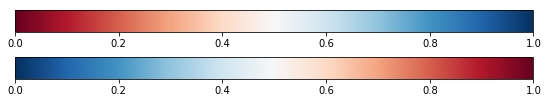

In [3]:
cmap = mpl.cm.RdBu

cmap_r = reverse_colourmap(cmap)

fig = plt.figure(figsize=(8, 2))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap = cmap, norm=norm,orientation='horizontal')
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap = cmap_r, norm=norm, orientation='horizontal')

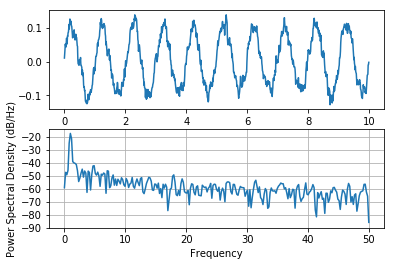

In [4]:
# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)

cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse

plt.subplot(211)
plt.plot(t, s)
plt.subplot(212)
plt.psd(s, 512, 1 / dt)

plt.show()

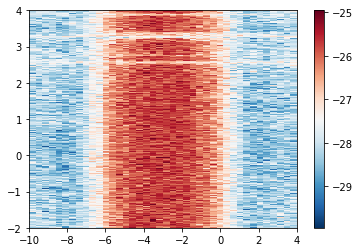

In [9]:
filename = 'two_tone_5p8e9_750p_1MHz_120e-6_276e-6_40_30av_probe_-30dbm_drive_-10dbm'
data = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\ExperimentalData\\Moscow Xmon\\{}.npy".format(filename))
plt.imshow(data,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower', extent=[-10,4,-2,4])
plt.colorbar()
np.savetxt("C:\\QubitData\\{}.csv".format(filename),data,delimiter=',')

In [130]:
data_rabi = np.transpose(np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\Run33\\run33\\precise10Hz_rabi_im_4ns_20nsDr_229nop_360av.npy"))
data_rabi_34 = np.transpose(np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\RUN34\\decay_data_result_40ns_47nsDr_500nop_100av.npy"))
data_ramsey = np.transpose(np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\Run33\\run33\\ramsey_re_4ns_27nsDr_151nop_200av.npy"))

In [19]:
data_x = np.arange(20e-3, 936e-3, 4e-3)
plt.plot(data_rabi_34)
plt.grid()
plt.xlabel("Длительность импульса, мкс")
plt.ylabel("Амплитуда, мВ")

Text(0, 0.5, 'Амплитуда, мВ')

In [273]:
data_decay = np.transpose(np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\Run33\\run33\\precise10Hz_rabi_im_4ns_20nsDr_229nop_360av.npy"))
len(data_decay)

229

In [276]:
fig = plt.figure()

ydata = data_decay

xdata = np.linspace(0, 0.91e-6, len(ydata))
#plt.plot(x_axis, re)
 

def fit_func(xi,ai, bi, of, decay, phase):
    return (ai*np.sin(bi*xi + phase)*np.exp(decay*xi) + of)
def fit_func_with_lf(xi,ai, bi, of, decay, phase, alf, blf, lf_phase):
    return (ai*np.sin(bi*xi + phase)*np.exp(decay*xi) + alf*np.sin(blf*xi + lf_phase) + of)



def fit_decay(xi, ampl, decay, offset):
    return ampl*np.exp(decay*xi) + offset

params, params_covariance  = scipy.optimize.curve_fit(fit_func, xdata, ydata, p0 = [9 , 60e6, 0.003, -0.002, np.pi/8])
#decay_params, decay_params_covariance  = scipy.optimize.curve_fit(fit_decay, xdata, ydata, p0 = [9 , 50e6, 0.003, -0.002])
#lf_params, lf_params_covariance = scipy.optimize.curve_fit(fit_decay, xdata, ydata, p0 = [9, -1e6, -27])

#print("Ampl: {}".format(lf_params[0]))
#print("Decay: {}".format(lf_params[1]))
#print("Offset: {}".format(lf_params[2]))
#print("decay: {}".format(lf_params[3]))
#print("phase: {}".format(lf_params[4]))
#print("Ampl_lf: {}".format(lf_params[5]))
#print("Freq_lf: {}".format(lf_params[6]))
#print("Phase_lf: {}".format(lf_params[7]))

print("Ampl: {}".format(params[0]))
print("Decay: {}".format(params[1]))
print("Offset: {}".format(params[2]))
print("decay: {}".format(params[3]))
print("phase: {}".format(params[4]))



plt.plot(xdata*1e6, ydata*1000)

plt.plot(xdata*1e6, fit_func(xdata, params[0], params[1], params[2], params[3], params[4])*1000)
#plt.plot(xdata*1e6, fit_decay(xdata, lf_params[0], lf_params[1], lf_params[2]))
#plt.title("Rabi")

plt.grid()
plt.legend(['Экспериментальные данные','Наложение теоретической зависимости'])
plt.xlabel("Длительность задержки, мкс")
plt.ylabel("Re(|S21|)")

Ampl: 1.1816636186732995e-05
Decay: 59217284.501062125
Offset: 0.0007925370063081136
decay: -2152247.4080754532
phase: -0.40159073076763024


Text(0, 0.5, 'Re(|S21|)')

# _Paper_

In [45]:
data_3dBm = np.transpose(np.loadtxt("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\Three tone exp\\AFc_dftnt powers\\res_7055_3rd_6p86_+3dbm_-10dbm_secondp 10p5G-20dbm.csv", skiprows = 3))
data_13dBm = np.transpose(np.loadtxt("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\Three tone exp\\AFc_dftnt powers\\res_7055_3rd_6p86_+13dbm_-10dbm_secondp 10p5G-20dbm.csv", skiprows = 3))
data_0dBm = np.transpose(np.loadtxt("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\Three tone exp\\AFc_dftnt powers\\res_7055_3rd_6p86_0dbm_-10dbm_secondp 10p5G-20dbm.csv", skiprows = 3))
data_n3dBm = np.transpose(np.loadtxt("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\Three tone exp\\AFc_dftnt powers\\res_7055_3rd_6p86_-3dbm_-10dbm_secondp 10p5G-20dbm.csv", skiprows = 3))
data_n5dBm = np.transpose(np.loadtxt("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\Three tone exp\\AFc_dftnt powers\\res_7055_3rd_6p86_-5dbm_-10dbm_secondp 10p5G-20dbm.csv", skiprows = 3))
data_n7dBm = np.transpose(np.loadtxt("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\Three tone exp\\AFc_dftnt powers\\res_7055_3rd_6p86_-7dbm_-10dbm_secondp 10p5G-20dbm.csv", skiprows = 3))
data_n10_7G055dBm = np.transpose(np.loadtxt("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\Three tone exp\\AFc_dftnt powers\\res_7055_3rd_7p055_+13dbm_-10dbm_secondp 10p5G-20dbm.csv", skiprows = 3))
data_without_3th = np.transpose(np.loadtxt("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\Three tone exp\\AFc_dftnt powers\\res_7055_without3rd_-10dbm_secondp 10p5G-20dbm.csv", skiprows = 3))

In [965]:
#plt.plot(data_n3dBm[1])
#plt.plot(data_3dBm[1])
#fig = plt.figure()

fig, ax1 = plt.subplots()




plt.plot(data_13dBm[0]/1e9, data_13dBm[1], 'r--')
#plt.plot(data_0dBm[0]/1e9, data_0dBm[1], 'b+')
#plt.plot(data_n7dBm[0]/1e9, data_n7dBm[1], 'g--')
plt.plot(data_without_3th[0]/1e9, data_without_3th[1], 'y+')#color='yellow', marker='^')

#plt.grid()
plt.xlabel("Frequency, GHz")
plt.ylabel("|S21|, dB")
plt.legend(['+13dBm','0dBm', '-7dBm', 'no 3th tone'])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.65, 0.2, .25, .25]
ax2 = fig.add_axes([left, bottom, width, height])

#a = plt.axes([0.6, 0.2, .25, .25], facecolor='w')
plt.plot(x_trunc/1e9, dt1, 'r--')
#plt.plot(x_trunc/1e9, dt2, 'b+')
#plt.plot(x_trunc/1e9, dt3, 'g--')
plt.plot(x_trunc/1e9, dt4, 'y+')

ymin, ymax = ax2.get_ylim()
ax2.set_yticks(np.round(np.linspace(ymin, ymax, 3), 2))

#xmin, xmax = x_trunc[0]/1e6, x_trunc[49]/1e6
#ax2.set_xticks(np.round(np.linspace(xmin, xmax, 3), 2))

#plt.title('Impulse response')
#plt.xlim(0, 0.2)
#plt.xticks([])
#plt.yticks([])

In [955]:
len(data_0dBm[0])
x_t = data_0dBm[0]
x_trunc = x_t[slice(180,230, 1)]
len(x_trunc)
x_trunc

array([7.05467054e+09, 7.05469054e+09, 7.05471054e+09, 7.05473054e+09,
       7.05475054e+09, 7.05477054e+09, 7.05479054e+09, 7.05481054e+09,
       7.05483054e+09, 7.05485054e+09, 7.05487054e+09, 7.05489054e+09,
       7.05491054e+09, 7.05493054e+09, 7.05495054e+09, 7.05497054e+09,
       7.05499054e+09, 7.05501054e+09, 7.05503054e+09, 7.05505054e+09,
       7.05507054e+09, 7.05509054e+09, 7.05511054e+09, 7.05513054e+09,
       7.05515054e+09, 7.05517054e+09, 7.05519054e+09, 7.05521054e+09,
       7.05523054e+09, 7.05525054e+09, 7.05527054e+09, 7.05529054e+09,
       7.05531054e+09, 7.05533054e+09, 7.05535054e+09, 7.05537054e+09,
       7.05539054e+09, 7.05541054e+09, 7.05543054e+09, 7.05545054e+09,
       7.05547054e+09, 7.05549054e+09, 7.05551054e+09, 7.05553054e+09,
       7.05555054e+09, 7.05557054e+09, 7.05559054e+09, 7.05561054e+09,
       7.05563054e+09, 7.05565054e+09])

In [956]:
d1 = data_13dBm[1]
d2 = data_0dBm[1]
d3 = data_n7dBm[1]
d4 = data_without_3th[1]

dt1 = d1[slice(180,230,1)]
dt2 = d2[slice(180,230,1)]
dt3 = d3[slice(180,230,1)]
dt4 = d4[slice(180,230,1)]


In [31]:
data_transponse = np.transpose(data)
plt.figure(figsize=(20,10))
plt.plot(data_transponse[0]/1e9, data_transponse[1])
plt.grid()

plt.xlabel("Часота, ГГц")
plt.ylabel("S21, dB")
#plt.plot(data_transponse[0], data_transponse[2])

Text(0, 0.5, 'S21, dB')

In [16]:
#two_tone_7dB = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\two_3rd_+7dbm_6.4e9_135p_90e-6_1e-6_40_5av_probe_0dbm_drive_-6dbm.npy")
#two_tone_n7dB = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\two_3rd_-7dbm_6.4e9_135p_90e-6_1e-6_40_5av_probe_0dbm_drive_-6dbm.npy")
#two_tone_without = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\two_tone_without3rd_6.4e9_135p_90e-6_1e-6_40_5av_probe_0dbm_drive_-6dbm.npy")
#tt_180p = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\two_tone_6.3e9_180p_90e-6_1e-6_40_200av.npy")
#sweetspot = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\RUN33\\run33\\sweetspot_-35dBm.npy")
acStarkfile = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\ExperimentalData\\Moscow Xmon\\AC_STARK_-40_-2dBm_5.65e9_5.85e9_2p5MHz_10Av.npy")

In [140]:
print(len(acStarkfile), (len(acStarkfile[0])))
np.linspace(-127,-93, 18)


20 81


array([-127., -125., -123., -121., -119., -117., -115., -113., -111.,
       -109., -107., -105., -103., -101.,  -99.,  -97.,  -95.,  -93.])

In [148]:
h=6.62e-34
C_c=14e-15
C_r=391e-15
f_res=6.46e9
G1=4.3e6
V_n=np.sqrt(h*f_res/C_r)
print(G1)

num_ = 18

dBStark = np.linspace(-127,-93, num_)
dBStark
powerStark = np.empty(num_)
VinStark = np.empty(num_)
nStark = np.empty(num_)
for i in range(num_):
        powerStark[i]=10**((dBStark[i]-30)/10)
        VinStark[i]=np.sqrt(powerStark[i]*50)
        nStark[i]=((2*C_c*V_n*VinStark[i])**2)/((G1**2)*h**2)
nStark

4300000.0


array([1.05571557e+01, 1.67319642e+01, 2.65183762e+01, 4.20287939e+01,
       6.66111493e+01, 1.05571557e+02, 1.67319642e+02, 2.65183762e+02,
       4.20287939e+02, 6.66111493e+02, 1.05571557e+03, 1.67319642e+03,
       2.65183762e+03, 4.20287939e+03, 6.66111493e+03, 1.05571557e+04,
       1.67319642e+04, 2.65183762e+04])

In [120]:
V_n

1.045819836508556e-05

In [38]:
plt.figure()
plt.plot(nStark)
#y_ticks = np.arange(0, 19, 5)
#plt.yticks(y_ticks, nStark)

#plt.plot(np.log(nStark))

In [198]:
plt.figure()

y_ticks = np.arange(0.5, 15, 3)
y_labels = nStark[::3]


plt.imshow(acStarkfile[:15], interpolation='bilinear', aspect='auto', cmap=cmap_r, origin = 'lower', extent = (5.65, 5.85, 0, 14))
plt.yticks(y_ticks, y_lab_str)
plt.ylabel("Averaged number of photons")
plt.xlabel("Driving frequency(GHz)")

plt.show()
cbar = plt.colorbar()
cbar.ax.set_ylabel("|S21| (dBm)", labelpad = 20)

Text(0, 0.5, '|S21| (dBm)')

In [178]:
plt.figure()

plt.imshow(acStarkfile[:15], interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')
plt.yticks(y_ticks, y_lab_str)

([<matplotlib.axis.YTick at 0x28e0d0b8>,
 <a list of 6 Text yticklabel objects>)

In [157]:
nStark

array([1.05571557e+01, 1.67319642e+01, 2.65183762e+01, 4.20287939e+01,
       6.66111493e+01, 1.05571557e+02, 1.67319642e+02, 2.65183762e+02,
       4.20287939e+02, 6.66111493e+02, 1.05571557e+03, 1.67319642e+03,
       2.65183762e+03, 4.20287939e+03, 6.66111493e+03, 1.05571557e+04,
       1.67319642e+04, 2.65183762e+04])

In [180]:
y_lab_str = []
for i in range(len(y_labels)):
    y_lab_str.append('{:0.2f}'.format(y_labels[i]))
y_lab_str


['10.56', '42.03', '167.32', '666.11', '2651.84', '10557.16']

In [122]:
fig = plt.figure()
matplotlib.rcParams.update({'font.size': 18})
6.4e9 + 134*5e6
x_ticks = np.arange(0, 80, 10)
x_ticks
x_labels = np.arange(50, 130, 10)
y_ticks = np.arange(0, 134, 26.8)
#y_labels = np.arange(7.0515e9, 7.0595e9, 0.08e6)
y_labels = np.arange(6.4e9, 7.07e9, 5e6)
x_ax = np.arange(50, 130, 1)
y_ax = np.arange(7.0515e9, 7.0595e9, 0.08e6)
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels/1e9)
plt.ylabel("Частота, ГГц")
plt.xlabel("Ток, мкА")

plt.imshow(two_tone_without, interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')
plt.colorbar()
plt.show()

In [93]:
tt = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\RUN33\\run33\\two_3rd_+7dbm_6.4e9_135p_90e-6_1e-6_40_5av_probe_0dbm_drive_-6dbm.npy")

In [94]:
fig = plt.figure()
x_ax = np.arange(90, 110, 1)
y_ax = np.arange(6.4e9, 7.07e9, 5e6)

x_ticks = np.arange(0, 20, 5)
x_ticks
x_labels = np.arange(90, 115, 5)
y_ticks = np.arange(0, 134, 26.8)
y_labels = np.arange(6.4e9, 7.07e9, 2*66.9e6)

plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
plt.ylabel("Частота, Гц")
plt.xlabel("Ток, мкА")
plt.imshow(tt,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')
plt.colorbar()

In [613]:
6.4e9 + 134*5e6
x_ticks = np.arange(0, 20, 5)
x_ticks
x_labels = np.arange(90, 115, 5)
y_ticks = np.arange(0, 134, 26.8)
y_labels = np.arange(6.4e9, 7.07e9, 2*66.9e6)

In [800]:
tt1 = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\two_3rd_+7dbm_6.4e9_135p_90e-6_1e-6_40_5av_probe_0dbm_drive_-6dbm.npy")
tt2 = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\two_3rd_-7dbm_6.4e9_135p_90e-6_1e-6_40_5av_probe_0dbm_drive_-6dbm.npy")
tt3 = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\two_tone_without3rd_6.4e9_135p_90e-6_1e-6_40_5av_probe_0dbm_drive_-6dbm.npy")
fig = plt.figure()
plt.title("+7dBm")
plt.imshow(tt1,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')
fig = plt.figure()
plt.title("-7dBm")
plt.imshow(tt2,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')
fig = plt.figure()
plt.title("without 3th")
plt.imshow(tt3,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')

In [631]:
np.savetxt("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\two_3rd_+7dbm_6.4e9_135p_90e-6_1e-6_40_5av_probe_0dbm_drive_-6dbm.csv", tt1, delimiter = ',')

In [134]:
import os
from datetime import datetime
entries = os.listdir('C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)')

def convert_date(timestamp):
    d = datetime.utcfromtimestamp(timestamp)
    formated_date = d.strftime('%d-%b-%Y_')
    return formated_date

os.mkdir("D:\\Tempio\\Qubit0\\I-Tone")
#D:\RSF\run35

In [169]:
from time import gmtime, strftime, localtime
qubitNumber = 3
experiment_type = 'two_tone' #'sweetspot', 'rabi', 'ramsey', 'decay', 'spinEcho'

time_part = strftime("%H-%M-%S", localtime())
date_part = strftime("%B-%d-%Y", localtime())
print("{}\\qubit_{}\\{}_{}".format(date_part, roman[qubitNumber], time_part, experiment_type))

rootFolder = '{}'.format(date_part)
qubitNumFolder = 'Qubit_{}'.format(roman[qubitNumber])

print('{}\\{}'.format(rootFolder, qubitNumFolder))

June-04-2019\qubit_III\19-15-47_two_tone
June-04-2019\Qubit_III


In [214]:
rootFolderExistFlag = 0

def get_rootFolderName():
    return ('{}'.format(strftime("%B-%d-%Y", localtime())))
def get_internalFolderName(QubitNumber):
    roman = {0: '0', 1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V',
                6: 'VI', 7: 'VII', 8: 'VIII', 9: 'IX', 10: 'X', 20: 'XX',
                30: 'XXX', 40: 'XL', 50: 'L', 60: 'LX', 70: 'LXX', 80: 'LXXX',
                90: 'XC', 100: 'C', 200: 'CC', 300: 'CCC', 400: 'CD', 500: 'D',
                600: 'DC', 700: 'DCC', 800: 'DCCC', 900: 'CM', 1000: 'M',
                2000: 'MM', 3000: 'MMM'}
    return ('Qubit_{}'.format(roman[QubitNumber]))
def get_measTypeFolderName(measType = 'sweetspot'):
    return ('{}_{}'.format(strftime("%H-%M-%S", localtime()), measType))
get_internalFolderName(1)
get_rootFolderName()
get_measTypeFolderName('two_tone')

'20-23-29_two_tone'

In [181]:
try:
    os.mkdir("D:\\RSF\\run35\\{}".format(rootFolder))
except FileExistsError:
    pass#print("Directory already exists")
if(rootFolderExistFlag != 1):
    
    try:
        os.mkdir("D:\\RSF\\run35\\{}\\{}".format(rootFolder, qubitNumFolder))
    except FileExistsError:
        pass
    else:
        rootFolderExistFlag = 1
        

In [199]:
data = np.array(np.random.normal(0,1,100))
frequency = list()
current = list()
for i in range(10):
    frequency.append(1e9+200e6*i)
    current.append(0 + 1e-5*i)
    
dictio = {'Frequency': frequency, 'current': current, 'data':data}


In [217]:
import pickle
with open('D:\\RSF\\run35\\{}\\{}\\{}.pickle'.format(rootFolder, qubitNumFolder, get_measTypeFolderName('two_tone')), 'wb') as actual_file:
    pickle.dump(dictio, actual_file)

In [7]:
with open('D:\\RSF\\run35\\{}\\{}\\data.pickle'.format(rootFolder, qubitNumFolder), 'rb') as actual_file:
    data_from_file = pickle.load(actual_file)
data_from_file

NameError: name 'rootFolder' is not defined

In [319]:
import numpy as np
from time import sleep

class MeasThread:
    def __init__(self):
        self.data = np.zeros(0)  # To store the data of the measurement
        self.step = 0  # To keep track of the step

    def make_measurement(self, start, stop, num_points, delay):
        x_axis = np.linspace(start, stop, num_points)
        self.data = np.zeros(num_points)
        self.data_append = list()
        self.step = 0
        for i in x_axis:
            # Acquire fake data
            self.data[self.step] = np.random.random()
            self.data_append.append(np.random.normal(0,1,1))
            self.step += 1
            sleep(delay)

        return self.data
class plot1DPrepare:
    def __init__(self):
        #self.fig = plt.figure()
        self.data = []
        self.xAxis = []
        self.xlabel = 'XLabel'
        self.ylabel = 'YLabel'
        self.title = 'Title'
        self.legend = ['Plot1']
        self.first_start = 0
    def create_plot(self, xAxis_Dimension = 'None', yAxis_Dimension = 'None'):
        fig = plt.figure()
        fig.set_size_inches(10, 6)
        plt.grid()
        plt.xlabel('{}'.format(self.xlabel))
        plt.ylabel('{}'.format(self.ylabel))
        plt.title('{}'.format(self.title))
    def create_2sub_plots(self, xAxis_Dimension = 'None', yAxis_Dimension = 'None'):
        self.fig = plt.figure()
        self.ax1 = self.fig.add_subplot(2,1,1)
        self.ax1.grid()
        self.ax2 = self.fig.add_subplot(2,1,2)
        self.ax2.grid()
        plt.setp(self.ax1.get_xticklabels(), visible = False)
        fig.set_size_inches(10,6)
        if xAxis_Dimension != 'None':
            self.ax1.set_xlim(right = xAxis_Dimension)
            self.ax2.set_xlim(right = xAxis_Dimension)
        if yAxis_Dimension != 'None':
            self.ax1.set_ylim(top = yAxis_Dimension)
            self.ax2.set_ylim(top = yAxis_Dimension)
            
    def plot_prepare():
        self.ax1.xlabel()
        self.ax2.xlabel()
    
    def update_data(self, new_data):
        self.ax1.clear()
        self.ax2.clear()
        self.ax1.grid()
        self.ax2.grid()
        
        self.ax1.plot(new_data)
        self.ax2.plot(new_data)
        plt.setp(self.ax1.get_xticklabels(), visible = False)
        
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()
        
        if self.first_start == 0:
            self.ax1.legend([self.legend])
            self.first_start = 1
            if len(self.legend) > 1:
                self.ax2.legend([self.legend])
            else:
                self.ax2.legend([''])    
        

In [ ]:
oneTonePlot = plot1DPrepare()
oneTonePlot.legend = ['Rabi', 'Fit']
oneTonePlot.create_2sub_plots(xAxis_Dimension = 200)
oneTonePlot.update_data(np.random.normal(0,1,100))

In [ ]:
oneTonePlot.update_data(np.random.normal(0,1,100))

In [653]:
import threading
%matplotlib
ohm = MeasThread()
fig = plt.figure()
t = threading.Thread(target=ohm.make_measurement, args=(0,1,51,0.1))
#p = threading.Thread(target=ohm.plot_display, args=(10,0.5))
#p.start()

t.start()
print('Triggered measurement')
i = ohm.step
while t.is_alive():
    plt.grid()
    plt.plot(ohm.data_append, 'go--')
    fig.canvas.draw()
    fig.canvas.flush_events()        
    i = ohm.step

Using matplotlib backend: Qt5Agg
Triggered measurement


In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
#ax2 = fig.add_subplot(2,1,2)
plt.setp(ax1.get_xticklabels(), visible=True)
fig.set_size_inches(10, 6)
ax1.set_xlim(right=100)
ax1.set_ylim(top=100)
ax1.set_ylabel("Frequency, GHz")
ax1.set_xlabel("Current, mA")
ax1.grid()

plt.title("Graph example")
data = list()
data_fit = []
for i in range(100):
    data.append(i+np.random.normal(0,1,1))
    data_fit.append(i+np.random.normal(0,5,1))
    ax1.legend(['Rabi', 'Fit'])
    ax1.plot(data, 'go--')
    ax1.plot(data_fit, 'c')
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.05)


In [799]:
#fig = plt.figure()
#plt.imshow(tt_600p, interpolation='nearest', aspect='auto', cmap=cm.RdBu, origin = 'lower')
#plt.colorbar()
#plt.show()

def z(x,y):
    xout = []
    xnorm = []
    xmean = np.mean(x)
    for i in range(len(x)):
        xout.append(-(x[i]-xmean)**2)
    xmax = np.max(xout)
    xmin = np.min(xout)
    for i in range(len(x)):
        xnorm.append((xout[i]-xmin)/(xmax-xmin))
    return xnorm
x = np.linspace(0,20,20)
fig = plt.figure()
plt.plot(z(x,0))


In [279]:

ramsey = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\rabi_re_4ns_20nsDr_201nop_100av.npy")

#x_ticks = np.arange(0, 20, 5)
#x_labels = np.arange(90, 115, 5)
#y_ticks = np.arange(0, 134, 26.8)
#y_labels = np.arange(6.4e9, 7.07e9, 2*66.9e6)
x_label = np.linspace(0,600e-9, 151)
#plt.xticks(x_ticks, x_labels)
#plt.yticks(y_ticks, y_labels)

fig = plt.figure()
plt.xlabel("Длительность задержки, мкс")
plt.ylabel("Re(|S21|)")
plt.plot(ramsey)

In [971]:
tt1 = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\two_3rd_+7dbm_6.4e9_135p_90e-6_1e-6_40_5av_probe_0dbm_drive_-6dbm.npy")
tt2 = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\two_3rd_-7dbm_6.4e9_135p_90e-6_1e-6_40_5av_probe_0dbm_drive_-6dbm.npy")
tt3 = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\two_tone_without3rd_6.4e9_135p_90e-6_1e-6_40_5av_probe_0dbm_drive_-6dbm.npy")
fig = plt.figure()
plt.title("+7dBm")
plt.imshow(tt1,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')
plt.plot(fit_func_parab(xdata, params[0], params[1], params[2]), 'b--')
fig = plt.figure()
plt.title("-7dBm")
plt.imshow(tt2,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')
fig = plt.figure()
plt.title("without 3th")
plt.imshow(tt3,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')


In [11]:
5.3e9 + 500 * 2.5e6
print(len(tt), len(tt[0]))

500 21


# _3-й тон обработка_

In [23]:
filename = 'three_tone_6p27_5dbm_5p3e9_230p_2p5MHz_160e-6_230e-6_35_1av_probe_-30dbm_drive_-20dbm.npy'

tt = np.load("C:\\Users\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\ExperimentalData\\Moscow Xmon\\6p45G\\6p27 third\\6p465766\\{}".format(filename))

In [24]:
print(len(tt), len(tt[0]))
fig = plt.figure()
plt.imshow(tt,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower', extent = [160, 230, 5.3e9, 6.55e9])
plt.ylabel("Frequency, Hz")
plt.xlabel("Current, uA")
plt.colorbar()


500 21


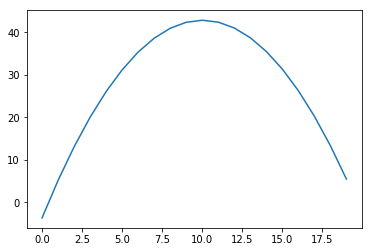

In [24]:
plt.plot(fit_func_parab(xdata, params[0], params[1], params[2]))

[75, 5, 11, 18, 25, 30, 35, 39, 41, 43, 44, 43, 42, 39, 36, 32, 26, 19, 11, 7] 20


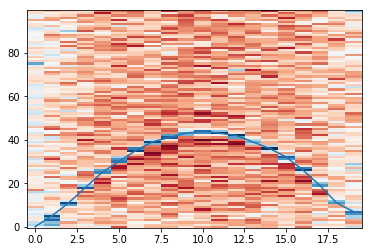

In [18]:
t_trunc = []
for i in range(100):
    temp = []
    for j in range(20):
        temp.append(tt[i+55][j+9])
    t_trunc.append(temp)

data = np.transpose(t_trunc)
data_y = []    
for i in range(len(data)):
    #maxio = np.max(data[i])
    minio = np.min(data[i])
    temp = []
    for j in range(len(data[0])):
        if data[i][j] == minio:
            data_y.append(j)
print(data_y, len(data_y))

fig = plt.figure()
plt.imshow(t_trunc, interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')
plt.plot(data_yx)
        

In [17]:
data_yx = data_y
temp_fr = []
for i in range(len(data_y)):
    temp_fr.append((data_y[i]+55)*5e6+5.3e9)
print(temp_fr)

[5575000000.0, 5600000000.0, 5630000000.0, 5665000000.0, 5700000000.0, 5725000000.0, 5750000000.0, 5770000000.0, 5780000000.0, 5790000000.0, 5795000000.0, 5790000000.0, 5785000000.0, 5770000000.0, 5755000000.0, 5735000000.0, 5705000000.0, 5670000000.0, 5630000000.0, 5610000000.0]


In [88]:
f_6g27 = {'dBm': [-18.3, -16.3, -14.3, -12.3, - 10.3, -7, -5, -3, -1, 1, 3, 5, 7, 9], "Frequency": [5.7925e9, 5.79e9, 5.795e9, 5.785e9, 5.7775e9, 5.74e9, 5.75e9, 5.7275e9, 5.71125e9, 5.68e9, 5.625e9, 5.57e9, 5.51e9, 5.345e9]}
f_6g63 = {'dBm': [-7,-3,0,7,8,10,13], 'Frequency': [5.8e9, 5.7975e9, 5.7875e9, 5.73e9, 5.71e9, 5.66e9, 5.551e9]}
f_6g67 = {'dBm': [-18.3, -16.3, -14.3, -10.3, -8.3, -7,-6,-5,-4,-3,-2,-1], "Frequency": [5.78e9, 5.775e9, 5.7775e9, 5.735e9, 5.7075e9, 5.65e9, 5.615e9, 5.58e9, 5.55e9, 5.49e9, 5.4525e9, 5.3775e9]}
f_6g74 = {'dBm': [-7,-3,0,7,13], 'Frequency': [5.8e9, 5.7925e9, 5.795e9, 5.77e9, 5.58e9]}
f_7g46 = {'dBm': [-7,-5,-3,-1,1,3,5,7,9, 13], 'Frequency': [5.795e9,5.7925e9,5.785e9, 5.7825e9, 5.77e9, 5.7525e9, 5.7325e9, 5.695e9, 5.6475e9, 5.445e9]}
f_7g65 = {'dBm': [9,13], 'Frequency': [5.7775e9, 5.765e9]}
f_6g67_att = {'dBm': [-18.3, -16.3, -14.3, -10.3, -8.3], 'Frequency': [5.78e9, 5.775e9, 5.7775e9, 5.735e9, 5.7075e9]}

f3 = {'f3':[6.670430e9, 6.672398e9, 6.674192e9, 6.675200e9, 6.676021e9, 6.677629e9], "f1": [5.745e9, 5.6e9, 5.455e9, 5.6e9, 5.674e9, 5.7425e9]}

In [62]:
fig = plt.figure()
plt.plot(f_6g27['dBm'], f_6g27['Frequency'])
plt.plot(f_6g67['dBm'], f_6g67['Frequency'])
plt.plot(f_6g63['dBm'], f_6g63['Frequency'])
plt.plot(f_6g74['dBm'], f_6g74['Frequency'])
plt.plot(f_7g46['dBm'], f_7g46['Frequency'])
#plt.plot(f_6g67_att['dBm'], f_6g67_att['Frequency'])
plt.xlabel('dBm')
plt.ylabel('Frequency')
plt.legend(["6.27GHz", "6.67GHz", "6.63GHz", "6.74GHz", "7.46GHz", "7.65GHz"])

In [89]:
fig = plt.figure()
plt.plot(f3['f3'], f3['f1'])
plt.xlabel('Частота третьего тона')
plt.ylabel('Частота перехода')

Text(0, 0.5, 'Частота перехода')

In [61]:
data = np.transpose(t_trunc)
data_y = []

fig = plt.figure()

for i in range(len(data)):
    maxio = np.max(data[i])
    temp = []
    for j in range(len(data[0])):
        if data[i][j] == maxio:
            data_y.append(j)
print(data_y, len(data_y))
plt.plot(data_y)   

[107, 128, 142, 150, 152, 147, 140, 121, 114] 9


In [96]:
data = np.transpose(tt[:120])
data_y = []

fig = plt.figure()

for i in range(len(data)):
    maxio = np.max(data[i])
    temp = []
    for j in range(len(data[0])):
        if data[i][j] == maxio:
            data_y.append(j)
print(data_y, len(data_y))
plt.plot(data_y)


[26, 28, 34, 34, 38, 40, 40, 41, 43, 43, 43, 43, 42, 40, 39, 35, 32, 31, 27, 23] 20


In [281]:
len(tt3[0])
np.max(tt3)
np.min(tt3)
tnorm = []
for i in range(len(tt3)):
    temp = []
    for j in range(len(tt3[0])):
        
        temp.append((tt3[i][j] - np.min(tt3))/(np.max(tt3)-np.min(tt3)))
    tnorm.append(temp)
fig = plt.figure()
plt.imshow(tnorm,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')
plt.colorbar()

NameError: name 'tt3' is not defined

In [96]:
fig = plt.figure()

#ydata = data_yx
#data_yx[0] = 0

x_ticks = np.arange(0, 20, 5)
x_labels = np.arange(90, 115, 5)
y_ticks = np.arange(0, 43, 5)
y_labels = np.arange(6.4e9, 7.07e9, 2*66.9e6)
y_labels = np.linspace(6.4e9, 7.07e9, 135)

xdata = np.linspace(0, 19, len(ydata))
#plt.xticks(x_ticks, x_labels)
#plt.yticks(y_ticks, y_labels)
plt.ylabel("Частота, Гц")
plt.xlabel("Ток, мкА")

def fit_func_parab(xi, Ampl, OFFSET, Xmean):
    return (-Ampl*(xi-Xmean/2)**2 +OFFSET)

params, params_covariance  = scipy.optimize.curve_fit(fit_func_parab, xdata, data_yx, p0 = [1 , 25, 20])
print(params)
plt.plot(data_yx)
plt.grid()

plt.plot(fit_func_parab(xdata, params[0], params[1], params[2]))
plt.legend(["Экспериментальные данные","Наложение теоретической зависимости"])


[ 0.46343131 97.83400496 20.03834808]


In [95]:
for i in range(len(data_yx)):
    data_yx[i] = data_yx[i] + 55
print(data_yx)

[55, 60, 66, 73, 80, 85, 90, 94, 96, 98, 99, 98, 97, 94, 91, 87, 81, 74, 66, 62]


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


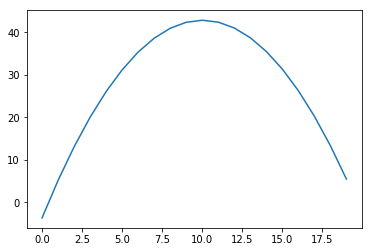

In [77]:
xdata = np.linspace(0, 19, 20)
plt.plot(fit_func_parab(xdata, params[0], params[1], params[2]))
print(xdata)


In [97]:
print(len(tt), len(tt[0]))
fig = plt.figure()
plt.imshow(tt,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower', extent = [0, 35, 0, 230])
plt.colorbar()
plt.plot(x_ax, fit_func_parab(xdata, params[0], params[1], params[2]), 'b--')

250 35


In [85]:
x_ax = np.linspace(0+10, 19+10, 20)
x_ax

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29.])

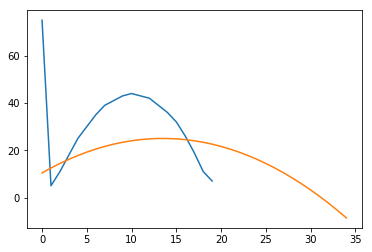

In [71]:
fig = plt.figure()
plt.plot(data_y)
plt.plot(fit_func_parab(xdata, 0.08 , 25, 27))

In [968]:
data_out = fit_func_parab(xdata, params[0], params[1], params[2])
np.savetxt('fit_data_+7dBm.csv', data_out, delimiter = ',')

# _Оценка частоты резонатора_

In [175]:
#sweetspot_-40dBm.npy
afc = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\Three tone exp\\RUN33\\run33\\sweetspot_-40dBm.npy")


In [251]:
print(len(afc), len(afc[0]))
fig = plt.figure()
#plt.plot(afc_array)
#y_labels = np.linspace(7.0515e9, 7.0518e9, 101)
#y_ticks = np.arange(0, 101, 10)
#plt.yticks(y_ticks, y_labels)
#plt.imshow(afc,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')



def normalize_afc(data):
    temp = []
    maxv = np.max(data)
    minv = np.min(data)
    for i in range(len(data)):
        temp.append((data[i]-minv)/(maxv-minv))
    return temp    

def noise_add(data):
    temp = []
    
    for i in range(len(data)):
        temp_inner = []
        for j in range(len(data[0])):
            
            temp_inner.append(data[i][j] + np.random.normal(loc = 0, scale = 5))
        temp.append(temp_inner)
    return temp
noisy_data = noise_add(afc)

plt.imshow(noisy_data,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')
#noisy_data

101 80


In [227]:
afc_slice = []
for i in range(len(afc)):
    afc_slice.append(afc[i][30])
fig = plt.figure()
freq = np.linspace(7.0515e9, 7.0518e9, 101)
plt.plot(freq, afc_slice)


In [229]:
hi = float(0)
lo = float(0)

for i in range(len(afc_slice)):
    hi += afc_slice[i]
    lo += afc_slice[i]/(freq[i]**2)
res_freq = math.sqrt(hi/lo)
res_freq

7051652624.075306

In [ ]:
7051652624.075306

In [259]:
afc_array = []
for i in range(len(afc[0])):
  
    hi = float(0)
    lo = float(0)
    for j in range(len(afc)):
        hi += afc[j][i]
        lo += afc[j][i]/(freq[j]**2)
        #hi += afc[j][i]*(freq[i]**2)
        #lo = afc[j][i]/(freq[i]**2)
    afc_array.append(math.sqrt(hi/lo))
    #afc_array.append(math.sqrt(hi/lo))

fig = plt.figure()
#freq = np.linspace(7.0515e9, 7.0518e9, 101)
#axes = plt.gca()
#axes.set_ylim([7.0515e9, 7.0518e9])
plt.grid()
plt.plot(afc_array[1:])    

In [254]:
fig = plt.figure()
plt.plot(noisy_data[1])  

# __2D Plot empty and animate__

In [204]:
ny = len(tt)
nx = len(tt[0])
clear_data = []
for i in range(ny):
    temp = []
    for j in range(nx):
        temp.append(np.nan)
    clear_data.append(temp)

fig = plt.figure()
data = clear_data 
img = plt.imshow(data,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower', extent = (0,35e-6, 5.2e9, 5.9e9))

def init():
    img.set_data(clear_data)

def animate(i):
    yi = i // nx
    xi = i % nx
    data[yi][xi] = tt[yi][xi]
    img.set_data(data)
    img.autoscale()
    return img

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nx * ny,
                               interval=100)
plt.colorbar()

NameError: name 'tt' is not defined

In [58]:
import numpy as np
from time import sleep
from matplotlib import animation
import sys

class MeasThread:
    def __init__(self):
        self.data = np.nan#np.zeros(0)  # To store the data of the measurement
        self.step = 0  # To keep track of the step
        self.readout_power = -40
        self.stepTwoTone = 0

    def make_measurement(self, start, stop, num_points, delay):
        x_axis = np.linspace(start, stop, num_points)
        self.data = np.zeros(num_points)
        self.data_append = list()
        self.step = 0
        for i in x_axis:
            # Acquire fake data
            self.data[self.step] = np.random.random()
            self.data_append.append(np.random.normal(0,1,1))
            self.step += 1
            sleep(delay)
        return self.data
    def make_SingleTone(self, readout_dict, current_dict):
        self.SingleToneData = []
        self.singleToneCount = 0
        for iS in range(current_dict['nop']):
            #nwa.trig_meas()
            #nwa.get_data()
            #SingleToneData.append(nwa_data)
            self.singleToneCount += 1
        
    def make_twoTone(self, readoutFrequency = 6.4e9, driving = [5.1e9,2.5e6,10], current = [0,1e-6,5], rbw = '100', average = 1):
        #nwa.set_standard_config({"power":self.readout_power,"nop":2, "cf_span":[readoutFrequency, 2], "bandwidth":rbw, "meas_counts":average})
        #need change readout point number
        self.dataTwoTone = []
        self.stepTwoTone = 0
        for i in range(driving[2]):
            temp = []
            for j in range(current[2]):
                temp.append(np.nan)
            self.dataTwoTone.append(temp)
        with tqdm(total = driving[2], file=sys.stdout) as pbar:
            for iT in range(driving[2]):
                for jT in range(current[2]):
                    sleep(0.02)
                    self.dataTwoTone[iT][jT] = np.random.random()
                    self.stepTwoTone += 1;
                pbar.set_description('process: {}'.format(iT+1))
                pbar.update(1)
                    
    def make_AC_Stark(self, nwa_dict, current_dict, gen2_dict):
        self.acStarkData = []
        
class MeasDataClass():
    def __init__(self):
        self.XData = [0]
        self.YData = [0]
        self.singleToneData = []
        self.twoToneData = []
        self.rabiData = []
        self.ramseyData = []
        self.decayData = []
        self.echoData = []
class plot2DPrepare():
    def __init__(self, data_size):
        self.data = []
        self.YaxLim = (0,data_size[1])
        self.XaxLim = (0,data_size[0])
        self.xlabel = 'X label'
        self.ylabel = 'Y label'
        self.title = '2D Plot title'
        self.legend = [""]
        self.data = []
        
        self.ny = data_size[0]
        self.nx = data_size[1]
        clear_data = []
        for i in range(self.ny):
            temp = []
            for j in range(self.nx):
                temp.append(np.nan)
            clear_data.append(temp)
        self.data = clear_data
        
        fig = plt.figure()
        fig.set_size_inches(10,6)

        self.img = plt.imshow(self.data,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower', 
                         extent = (self.XaxLim[0], self.XaxLim[1], self.YaxLim[0], self.YaxLim[1]),animated=True, resample = False) 

        self.animate = animation.FuncAnimation(plt.gcf(), self.animatePlot,  interval=100)      
    def animatePlot(self, i):
        yi = i // self.nx
        xi = i % self.nx
        self.data[yi][xi] = np.random.random()
        self.img.set_data(self.data)
        self.img.autoscale()
        #plt.clf()
        return [self.img],       
                        
class MyDataFetchClass(threading.Thread):
    def __init__(self, dataClass):
        threading.Thread.__init__(self)

    def run(self):
        while True:
            # add data to data class
            self._dataClass.XData.append(self._dataClass.XData[-1] + 1)
            self._dataClass.YData.append(random.randint(0, 256))
            # sleep until next execution
            self._nextCall = self._nextCall + self._period;
            time.sleep(self._nextCall - time.time())        

In [8]:
ny = 10
nx = 5
clear_data = []
data = []
for i in range(ny):
    temp = []
    for j in range(nx):
        temp.append(np.nan)
    clear_data.append(temp)
data = clear_data    
def animatePlot(i):
    yi = i // nx
    xi = i % nx
    sleep(1)
    data[yi][xi] = np.random.random()
    img.set_data(data)
    img.autoscale()
    return img 
fig = plt.figure()
fig.set_size_inches(10,6)
img = plt.imshow(data,interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower',animated=True) 

def init():
    img.set_data(clear_data)
animate = animation.FuncAnimation(fig, animatePlot, init_func=init,  interval=100)

In [63]:
import threading
from tqdm import tqdm
%matplotlib

TestObject = MeasThread()
t = threading.Thread(target = TestObject.make_twoTone,\
                     args=(6.4e9, [5.1e9, 2.5e6, 41], [0, 1e-6, 31], '100', 1))

ny = 10
nx = 5
clear_data = []
data = []
for i in range(ny):
    temp = []
    for j in range(nx):
        temp.append(np.nan)
    clear_data.append(temp)
data = clear_data    

for i in range(ny):
    temp = []
    for j in range(nx):
        temp.append(np.nan)
    clear_data.append(temp)
data = clear_data 
def animatePlot(i):
    img.set_data(TestObject.dataTwoTone)
    img.autoscale()
    return img

fig = plt.figure()
fig.set_size_inches(10,6)
img = plt.imshow(data,interpolation = 'nearest', aspect = 'auto', cmap = cmap_r, \
                 origin = 'lower', extent = [0,1,2e9,4e9], animated = True) 
ax = plt.gca()
ax.set_xlabel("Current, mA")
ax.set_ylabel("Frequency, Hz")
ax.set_title("Two Tone Spectroscopy")
cbar  = plt.colorbar()
cbar.ax.set_title("S21, dB")
def init():
    img.set_data(clear_data)
animate = animation.FuncAnimation(fig, animatePlot, interval=500, repeat=False)
#init_func=init,
t.start()

Using matplotlib backend: Qt5Agg
process: 41: 100%|█████████████████████████████| 41/41 [00:26<00:00,  1.52it/s]


In [38]:
t.is_alive()


True

In [8]:
data_from_file = np.load("C:\\Users\\Dmitry\\Google Диск (dimonchikgvd@gmail.com)\\LQCE\\RUN38\\two_tone_-40dbm_7.8619G_5nop_8MHz_current_250_0_10ua_100nop_drive_5 dbm_att10_av10_10MHz_from 3GHz_18_09_17h_22m.npy")

fig = plt.figure()
plt.imshow(data_from_file, interpolation='nearest', aspect='auto', cmap=cmap_r, origin = 'lower')    
plt.colorbar()    

In [11]:
#data_from_file
#print(len(data_from_file), len(data_from_file[0]), len(np.transpose(data_from_file)))
fig = plt.figure()
plt.imshow(data_from_file[:270], interpolation='gaussian', aspect='auto', cmap=cmap_r, origin = 'lower')   

In [32]:
data_fixed = []
for i in range(len(np.transpose(data_from_file))):
    temp_sl = []
    for j in range(len(np.transpose(data_from_file)[0])):
        if np.transpose(data_from_file)[i][j] < -20:
            temp_sl.append(-20)
        else:
            temp_sl.append(np.transpose(data_from_file)[i][j])
    
    data_fixed.append(temp_sl)   
fig = plt.figure()
plt.imshow(np.transpose(data_fixed), interpolation='hamming', aspect='auto', cmap=cmap_r, origin = 'lower')    
plt.colorbar()    

## RUN23 RUN49 REPORT

In [42]:
data = np.transpose(np.loadtxt("D:\\LQCE\\runs 2018\\RUN31\\MSk_resonators\\res3_7GHz1_REs10Hz_AV20_-70dBm_mw612_ucran_2V7_RTucran.csv", skiprows = 3))

In [5]:
def save_as_pdf_file(file_name, *figures):
    with PdfPages("{}.pdf".format(file_name)) as pdf:
        for fi in figures:
            pdf.savefig(fi)
    #with PdfPages("{}.pdf".format(file_name)) as pdf:
    #    pdf.savefig()
def plot_create(file_name, filepath, *filenames):
    f = [0]*len(filenames)
    for index, item in enumerate(filenames):
        data = np.transpose(np.loadtxt("{}\\{}.csv".format(filepath, item), skiprows = 3))
        f[index] = plt.figure(figsize=(16,9))
        plt.plot(data[0], data[1])
        plt.grid()
        plt.xlabel("Frequency, Hz")
        plt.ylabel("S21, dB")
        plt.title("{}".format(item[:4]))
    save_as_pdf_file(file_name, *f)
#name =  "2msc_res2_70dbm"
#name1 = "3msc_res3_70dbm"
#name2 = "4msc_res4_70dbm"
#name3 = "1msc_res1_70dbm"
#name4 = "res5_7GHz296_REs10Hz_AV2_-70dBm_mw612_ucran_2V7_RTucran"
#name5 = "res6_7GHz38_REs10Hz_AV1_-70dBm_mw612_ucran_2V7_RTucran"
#name6 = "res6_7GHz38_REs10Hz_AV20_Span2MHz_-70dBm_mw612_ucran_2V7_RTucran"
   
#plot_create("D:\\LQCE\\Report\\run26_spectrum", "D:\\LQCE\\runs 2018\\RUN26\\msk_res\\20180830\\", name3, name, name1, name2)


In [172]:
save_as_pdf_file("D:\\LQCE\\Report\\Run32_Xmon_176-2", fig7, fig, fig1, fig2, fig3, fig4, fig5, fig6)

In [167]:
#RUN32
path = "D:\\LQCE\\runs 2018\\run32\\resonator1\\"
name = "01.11.2018_0249_ReIm"
current_filename = "01.11.2018_0249_CurrentCommonFile"
frequency_filename = "01.11.2018_0249_frequency"

date = "28.11.2018_0955"

ReIm = np.loadtxt("{}{}_ReIm.csv".format(path, date))
current = np.loadtxt("{}{}_CurrentCommonFile.csv".format(path, date))
frequency = np.loadtxt("{}{}_frequency.csv".format(path, date))

In [185]:
#RUN26
path = "D:\\LQCE\\runs 2018\\RUN26\\"
name = "28.08.2018_1811"
ReIm = np.loadtxt("{}{}_ReIm.csv".format(path, name))

In [186]:
def reim_to_s21(data):
    s21_data = list()#[0]*int(len(data)/2)
    for j in range(int(len(data)/2)):
        empty_s21 = [0]*len(data[0])
        for i in range(len(data[0])):
            empty_s21[i] = 20*math.log10(math.sqrt(data[2*j][i]**2 + data[2*j+1][i]**2))
        s21_data.append(empty_s21)
    return s21_data

dt = reim_to_s21(ReIm)
fig = plt.figure(figsize = (16,9))
plt.imshow(np.transpose(dt), aspect = "auto", cmap = cmap_r, origin = "lowest", extent = [current[0]*1e3,current[len(current)-1]*1e3, frequency[0]/1e9, frequency[len(frequency)-1]/1e9])
plt.xlabel("Current, mA")
plt.ylabel("Frequency, GHz")
plt.title("")
cbar  = plt.colorbar()
cbar.ax.set_title("S21, dB")

Text(0.5, 1.0, 'S21, dB')

In [222]:
data = np.transpose(np.loadtxt("D:\\LQCE\\RUN42\\20qubitarray_Full_spectrum_pwr0_4001.csv", skiprows = 3))

f = plt.figure(figsize=(18.5,10))

plt.plot(data[0], data[1])
plt.grid()
plt.xlabel("Frequency, GHz")
plt.ylabel("S21, dB")
plt.title("")
#f.savefig("D:\\LQCE\\Report\\run31_Full_spectrum.pdf", bbox_inches='tight')

Text(0.5, 1.0, '')

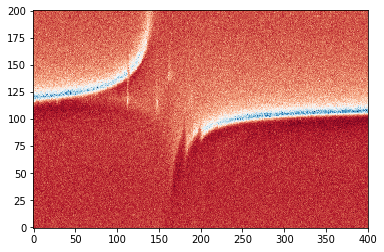

In [15]:
data = np.load("D:\\LQCE\\RUN49\\RES1\\ONETONE\\1.npy")
plt.imshow((data), aspect = "auto", cmap = cmap_r, origin = "lowest")

In [49]:
data = np.transpose(np.loadtxt("D:\\LQCE\\runs 2018\\RUN31\\MSk_resonators\\res1_6GHz98_REs100Hz_AV20_-70dBm_mw612_ucran_2V7_RTucran.csv", skiprows = 3))
data3 = np.transpose(np.loadtxt("D:\\LQCE\\runs 2018\\RUN31\\MSk_resonators\\res3_7GHz1_REs10Hz_AV20_-70dBm_mw612_ucran_2V7_RTucran.csv", skiprows = 3))
f = plt.figure(figsize=(18.5,10))
plt.plot(data[0], data[1])
plt.grid()
plt.xlabel("Frequency, GHz")
plt.ylabel("S21, dB")
plt.title("Resonator 1")
f1 = plt.figure(figsize=(18.5,10))
plt.plot(data3[0], data3[1])
plt.grid()
plt.xlabel("Frequency, GHz")
plt.ylabel("S21, dB")
plt.title("Resonator 3")
save_as_pdf_file("D:\\LQCE\\Report\\test", f,f1)


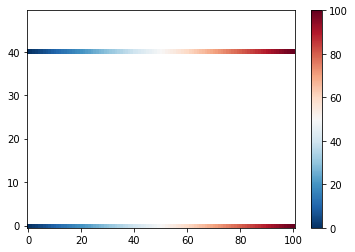

In [19]:
data = np.empty((50,101))
data[:] = np.NaN

for i in range(101):
    data[0][i] = i
    
for i in range(101):
    data[40][i] = i    
plt.imshow(data, aspect = "auto", cmap = cmap_r, origin = "lowest")
plt.colorbar()

In [193]:
import numpy as np
from time import sleep
import threading
%matplotlib

class TFMQ_Class:
    def __init__(self):
        self.step = 0  # To keep track of the step
        self.data_st = np.empty(1)
        self.data_tt = np.empty(1)
        self.st_step = 0
        self.tt_step = 0
        self.delay_st = 0.1
        self.delay_tt = 0.1
        self.plot_create_state = 0

    def tfsts(self, current_dict = {'start':0, "step":1e-6, 'points':11},freq_dict = {'center_freq':6e9,'span':10e6,'nop':101}, nwa_settings = {'power':-50, 'rbw':'100Hz', 'average_count':1}):
        self.data_st = np.empty((freq_dict['nop'],current_dict['points']))
        self.data_st[:] = np.NaN
        self.st_step = 0
        
        for i in range(current_dict['points']):
            for j in range(freq_dict['nop']):
                self.data_st[j][i] = np.random.random()
            sleep(self.delay_st)    
        return self.data_st
    def tftts(self, current_dict, gen1,gen2,nwa_settings):
        self.data_tt = np.empty((gen2['points'],current_dict['points']))
        self.data_tt[:] = np.NaN
        self.tt_step = 0
        for i in range(gen2['points']):
            for j in range(current_dict['points']):
                self.data_tt[i][j] = np.random.random()
                sleep(self.delay_tt)
        return self.data_tt       
                     
tfmq = TFMQ_Class()
p2d = DDPlot_Class()
current_dict = {'start':0.1e-3, 'step':0.2e-4, 'points':11}
freq_dict = {'center_freq':6e9,'span':10e6,'nop':51}
nwa_settings = {'power':-50, 'rbw':'100Hz', 'average_count':1}
freq2_dict = {'start_frequency':1e9, 'step_frequency':50e6, 'points':21}
dict_of_data_1 = {'current_params':current_dict, 'nwa_params':nwa_settings, 'gen1_params':freq_dict, 'gen2_params':freq2_dict}

#t = threading.Thread(target=tfmq.tfsts, args=(current_dict,freq_dict,nwa_settings))
t = threading.Thread(target=tfmq.tftts, args=(current_dict,freq_dict,freq2_dict,nwa_settings))
t.start()

fig = plt.figure(figsize = (16,9))
plt.imshow(tfmq.data_tt, aspect = "auto", cmap = cmap_r, origin = "lowest")
cbar = plt.colorbar()
plot_x0 = (current_dict['start'])*1e3
plot_x1 = (current_dict['start']+current_dict['step']*(current_dict['points']-1))*1e3
plot_y0 = freq2_dict['start_frequency']/1e9
plot_y1 = (freq2_dict['start_frequency'] + freq2_dict['step_frequency']*(freq2_dict['points']-1))/1e9
while t.is_alive():
    cbar.remove()
    plt.imshow(tfmq.data_tt, aspect = "auto", cmap = cmap_r, origin = "lowest", extent = [plot_x0, plot_x1, plot_y0, plot_y1])
    plt.title("Twotone Spectroscopy")
    plt.xlabel("Current, mA")
    plt.ylabel("Frequency, GHz")
    cbar = plt.colorbar()
    cbar.ax.set_title("|S21|, dB")
    fig.canvas.draw()
    fig.canvas.flush_events()
    
print("complete")
plt.imshow(tfmq.data_tt, aspect = "auto", cmap = cmap_r, origin = "lowest",extent = [plot_x0, plot_x1, plot_y0, plot_y1])

Using matplotlib backend: Qt5Agg
complete


In [176]:
fig = plt.figure()
plt.imshow(tfmq.data_tt, aspect = "auto", cmap = cmap_r, origin = "lowest")
plt.colorbar()
plt.show()

In [204]:
'''
file structure:
date / time of experiment
chip id
comment string(all available information about chip)
nwa_settings dict: POWER, RBW, NOP
1D current list
1D frequency list(gen1)
1D frequency list(gen2)
DATA 2D array
'''
from datetime import datetime, date, time
dt = datetime.now()
date_str = dt.strftime("%A, %d. %B %Y %I:%M%p")
chip_id_str = 'xmon_bmstu_000'
comment_str = 'testing comment string, nothing information about null qubit'
nwa_dict = nwa_settings
gen1_list = [0,1,2,3,4,5,5,6,7,7,8,9,9,0,10]
gen2_dict = freq2_dict

dfs = {'DATE':date_str, 'CHIP_ID':chip_id_str, 'COMMENT': comment_str,'NWA_SETTINGS':nwa_dict, 'CURRENT':current_dict, 'GEN1':gen1_list, 'GEN2':gen2_dict, 'DATA':tfmq.data_tt}


In [205]:
dfs

{'DATE': 'Saturday, 13. March 2021 05:06PM',
 'CHIP_ID': 'xmon_bmstu_000',
 'COMMENT': 'testing comment string, nothing information about null qubit',
 'NWA_SETTINGS': {'power': -50, 'rbw': '100Hz', 'average_count': 1},
 'CURRENT': {'start': 0.0001, 'step': 2e-05, 'points': 11},
 'GEN1': [0, 1, 2, 3, 4, 5, 5, 6, 7, 7, 8, 9, 9, 0, 10],
 'GEN2': {'start_frequency': 1000000000.0,
  'step_frequency': 50000000.0,
  'points': 21},
 'DATA': array([[0.02398909, 0.21480796, 0.3948177 , 0.99392848, 0.36016993,
         0.87646656, 0.87899527, 0.69843582, 0.90860402, 0.41106557,
         0.39562294],
        [0.74567014, 0.17437994, 0.37567933, 0.55601737, 0.28170935,
         0.0760267 , 0.19853459, 0.30901606, 0.09073395, 0.85435761,
         0.42790592],
        [0.83038727, 0.0541987 , 0.94346693, 0.44486865, 0.82429932,
         0.98740572, 0.60280764, 0.16489499, 0.70914728, 0.4647346 ,
         0.03625847],
        [0.84545137, 0.57296588, 0.79063264, 0.04057867, 0.92551423,
         0.224

In [99]:
dict_new = {'data':tfmq.data_st, 'current':current_dict, 'freq':freq_dict}
dict_new
fig = plt.figure()
plt.imshow(dict_new['data'])

In [28]:
def plot_display(self, data_len, time_to_sleep):
    fig = plt.figure()
    data_plot_in_thread = list()
    for i in range(data_len):
        data_plot_in_thread.append(i*1e-5)
        fig.canvas.draw()
        fig.canvas.flush_events()
        sleep(time_to_sleep)
        plt.show()
print(i)

101
